In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import qgrid

In [37]:
planets=sns.load_dataset('planets')

In [27]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [28]:
planets.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
number,1035,7,1,595,7,7
method,1035,10,Radial Velocity,553,Pulsation Timing Variations,1
year,1035,23,2011,185,1997,1
mass,513,381,1.8,6,7.75,1
distance,808,552,780,7,450,1
orbital_period,992,988,1845,2,5.6363,1


In [29]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [82]:
planets = (
    sns.load_dataset('planets')
    .assign(
        decade=lambda x: (10 * (x['year'] // 10)),
        method=lambda x: pd.Categorical(x['method']),
        year=lambda x: pd.to_datetime(x.year, format='%Y'))
    .sort_values(by='year')
    .reset_index(drop=True)
)
planets.info()
planets.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   method          1035 non-null   category      
 1   number          1035 non-null   int64         
 2   orbital_period  992 non-null    float64       
 3   mass            513 non-null    float64       
 4   distance        808 non-null    float64       
 5   year            1035 non-null   datetime64[ns]
 6   decade          1035 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 50.0 KB


,method,number,orbital_period,mass,distance,year,decade
1030,Transit,2,15.96540,NaN,NaN,2014-01-01,2010
1031,Transit,2,179.61200,NaN,NaN,2014-01-01,2010
1032,Transit,4,6.16486,NaN,NaN,2014-01-01,2010
1033,Transit,4,23.98020,NaN,NaN,2014-01-01,2010
1034,Transit,3,35.33310,NaN,NaN,2014-01-01,2010


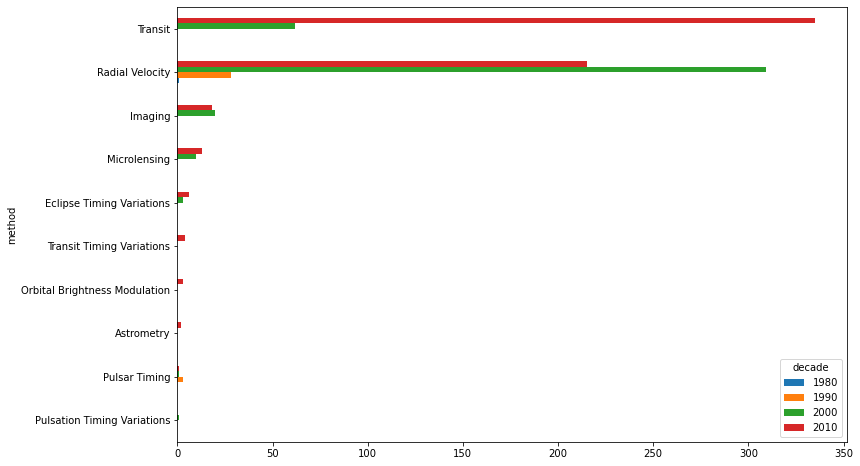

In [79]:
planets.pivot_table(values='number', index='method', columns=planets.decade,
                    aggfunc='count', fill_value=0).sort_values(by=2010).plot.barh(figsize=(12,8));

In [101]:
evolucion = (planets.pivot_table(values='number', index=planets.year.dt.year, columns='method',
                                 aggfunc='count', fill_value=0).stb.subtotal(grand_label='Total')
             .sort_values('Total', axis=1, ascending=False))
evolucion

method,Radial Velocity,Transit,Imaging,Microlensing,Eclipse Timing Variations,Pulsar Timing,Transit Timing Variations,Orbital Brightness Modulation,Astrometry,Pulsation Timing Variations
year,,,,,,,,,,
1989,1,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,2,0,0,0,0
1994,0,0,0,0,0,1,0,0,0,0
1995,1,0,0,0,0,0,0,0,0,0
1996,6,0,0,0,0,0,0,0,0,0
1997,1,0,0,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0
1999,15,0,0,0,0,0,0,0,0,0
2000,16,0,0,0,0,0,0,0,0,0


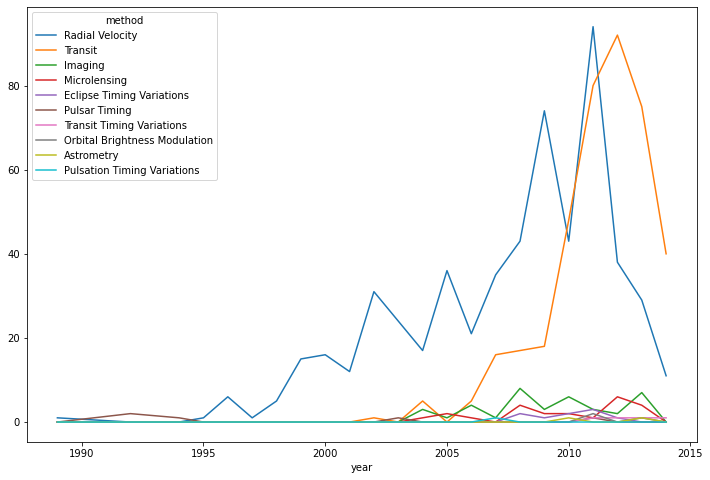

In [104]:
evolucion.iloc[0:-1].plot.line(figsize=(12,8));

In [111]:
qgrid.show_grid(planets)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…